<center> <h1> <b>BIRDSONGS<b></h1> </center>
<center> <h1>Syllable Tutorial</h1> </center>

# Define Objects

Import package and define matplotlib backend

In [1]:
# the following line enable interact with figures, 
# you can make zoom and save images from a poup matplotlib window
# to select points: qt ipympl tk. To just visualize: notebook
%matplotlib ipympl

import birdsongs as bs
from birdsongs.utils import *

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


Define directories path and show audio files

In [2]:
# root_path   = "path_to_repository\\'
# audios_path = "audios_path\\'
# bird_name   = "Zonotrichia capensis"
#audios_path = "C:\\Users\\sebas\\Documents\\GitHub\\audios\\Dissertation-xeno\\"#rufous-collared-sparrow\\humbolt\\"

paths  = bs.Paths()#audios_path=audios_path)              # root_path, audios_path, bird_name
ploter = bs.Ploter(save=True)   # to save figures save=True 
paths.ShowFiles()

The folder has 4 songs:
0                                           humman.wav
1    XC513182 - Rufous-collared Sparrow - Zonotrich...
2    XC11293 - Rufous-collared Sparrow - Zonotrichi...
3    XC104508 - Ocellated Tapaculo - Acropternis or...
dtype: object


Define, visualize and hear birdsong. The same funcion allow to us select the time of interest enabling SelectTime_on option

/home/saguileran/miniconda3/lib/python3.8/site-packages/scikit_maad-1.3.12-py3.8.egg/maad/sound/input_output.py:113: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, s = wavfile.read(filename)


The son has 6 syllables


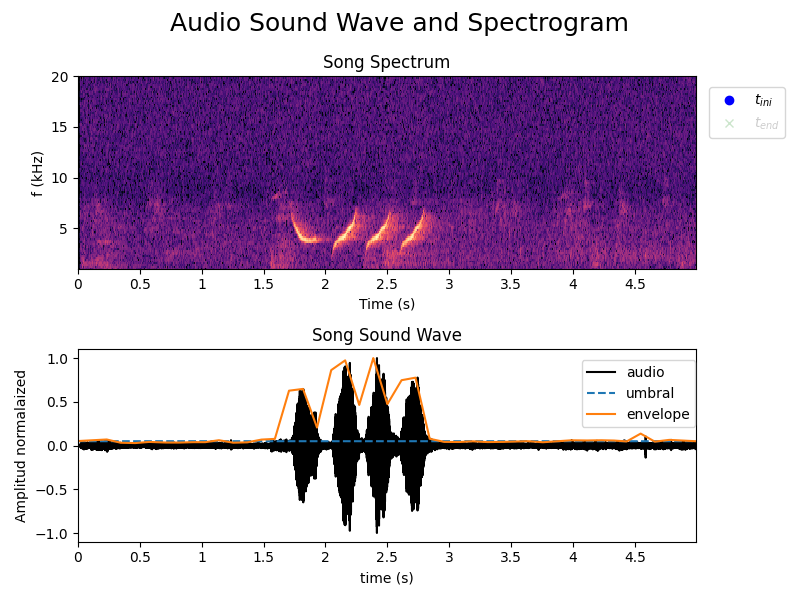

In [9]:
birdsong = bs.BirdSong(paths, no_file=1, NN=256, flim=(1e3,20e3), tlim=(0.,5),
                       Nt=5000, umbral=0.05, split_method="amplitud")
ploter.Plot(birdsong, FF_on=False, SelectTime_on=True)
AudioPlay(birdsong)

Select time inverval of interest

In [11]:
#time_interval = Positions(ploter.klicker)[0]
time_interval = np.array([1.7250, 1.9457])
print("Time interval selected: initial time {:.4f} s, final time {:.4f} s".format(time_interval[0], time_interval[1]))

Time interval selected: initial time 1.7250 s, final time 1.9457 s


Define syllable by the previous time interval selected

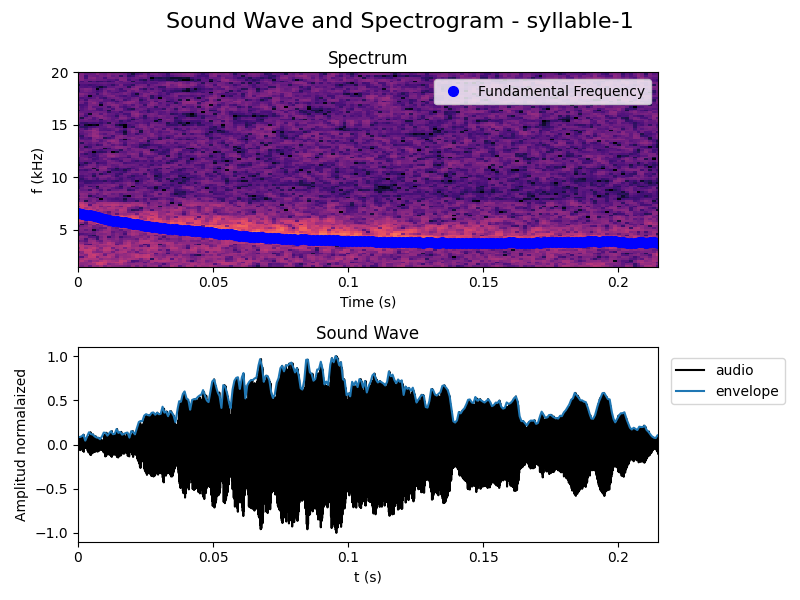

In [12]:
syllable = bs.Syllable(birdsong, tlim=time_interval, umbral_FF=1.0, NN=birdsong.NN, Nt=30, ide="syllable")
syllable.no_syllable = 1
ploter.Plot(syllable, FF_on=True)
AudioPlay(syllable)

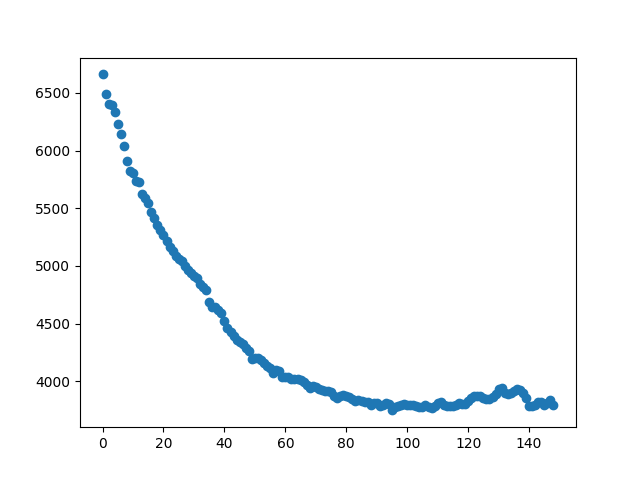

In [13]:
plt.figure(); plt.plot(syllable.FF, 'o'); plt.show();

3D plot (in process)

In [ ]:
# ploter.Plot3d(birdsong)

In [ ]:
# ploter.Plot(birdsong, FF_on=False, syllable=syllable)

Define syllable with the default syllable extractor

In [ ]:
# no_syllable    = int(input("Enter the syllable number (1 to {0}): ".format(bird.no_syllables)))
# syllable       = birdsong.Syllable(no_syllable=3)
# ploter.Plot(syllable)
# AudioPlay(syllable)

In [ ]:
# ploter.Plot(birdsong, FF_on=False, syllable_on=True, chunck_on=False)

# Optimal Synthetic Syllable

Define optimization method and its parameters 

In [14]:
brute     = {'method':'brute', 'Ns':11}  # , "workers":-1
optimizer = bs.Optimizer(syllable, method_kwargs=brute)
#?lmfit.minimize

Find optimal $\gamma$ for all the syllables computed by the syllables extractor. You can also just find the optimal for the single syllable

In [15]:
# optimal_gamma = optimizer.OptimalGamma(syllable)
optimal_gamma = 37000 # optimizer.AllGammas(birdsong)
syllable.p["gm"].set(value=optimal_gamma)

In [19]:
syllable.p

name,value,initial value,min,max,vary
a0,0.01000000,0.11,0.01000000,0.25000000,False
a1,0.00000000,0.05,-2.00000000,2.00000000,False
a2,0.00000000,0.0,0.00000000,2.00000000,False
b0,-0.25000000,-0.1,-1.00000000,0.50000000,False
b1,1.00000000,1,0.00000000,2.00000000,False
b2,2.00000000,0.0,0.00000000,2.00000000,False
gm,37000.0000,40000.0,10000.0000,100000.000,False


Optimal $\alpha$ and $\beta$

In [ ]:
#              [a0, a1, a2, b0, b1, b2]
# syllable.Set([0.01, 0, 0, -0.25, 1, 2])
# syllable.p["b2"].set(value=2)

In [ ]:
#optimizer.OptimalParams(syllable, Ns=5)

Display optimal parameters and generate a synthetic syllable 

In [20]:
Display(syllable.p)
synth_syllable = syllable.Solve(syllable.p)

name,value,initial value,min,max,vary
a0,0.01000000,0.11,0.01000000,0.25000000,False
a1,0.00000000,0.05,-2.00000000,2.00000000,False
a2,0.00000000,0.0,0.00000000,2.00000000,False
b0,-0.25000000,-0.1,-1.00000000,0.50000000,False
b1,1.00000000,1,0.00000000,2.00000000,False
b2,2.00000000,0.0,0.00000000,2.00000000,False
gm,37000.0000,40000.0,10000.0000,100000.000,False


/home/saguileran/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


Visualize and plot the synthetic syllable

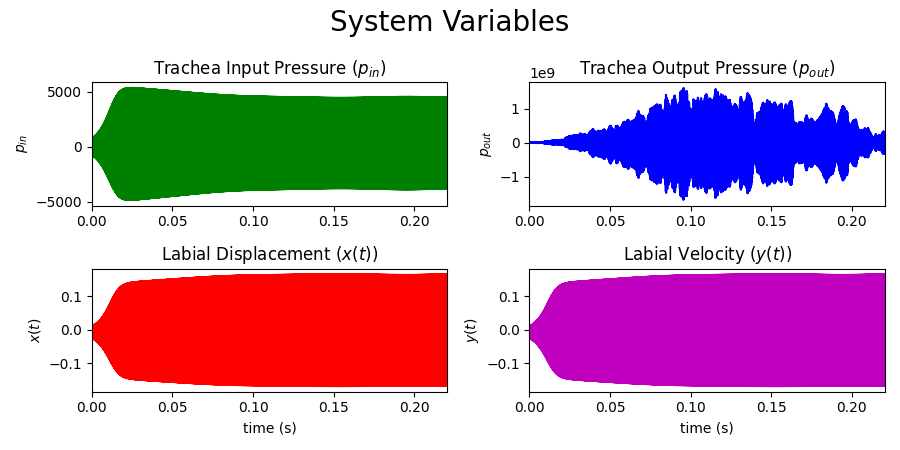

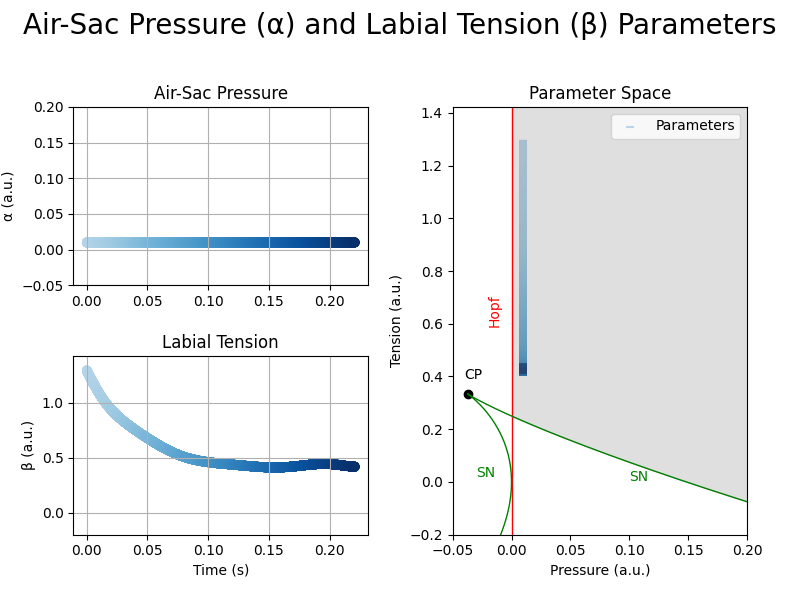

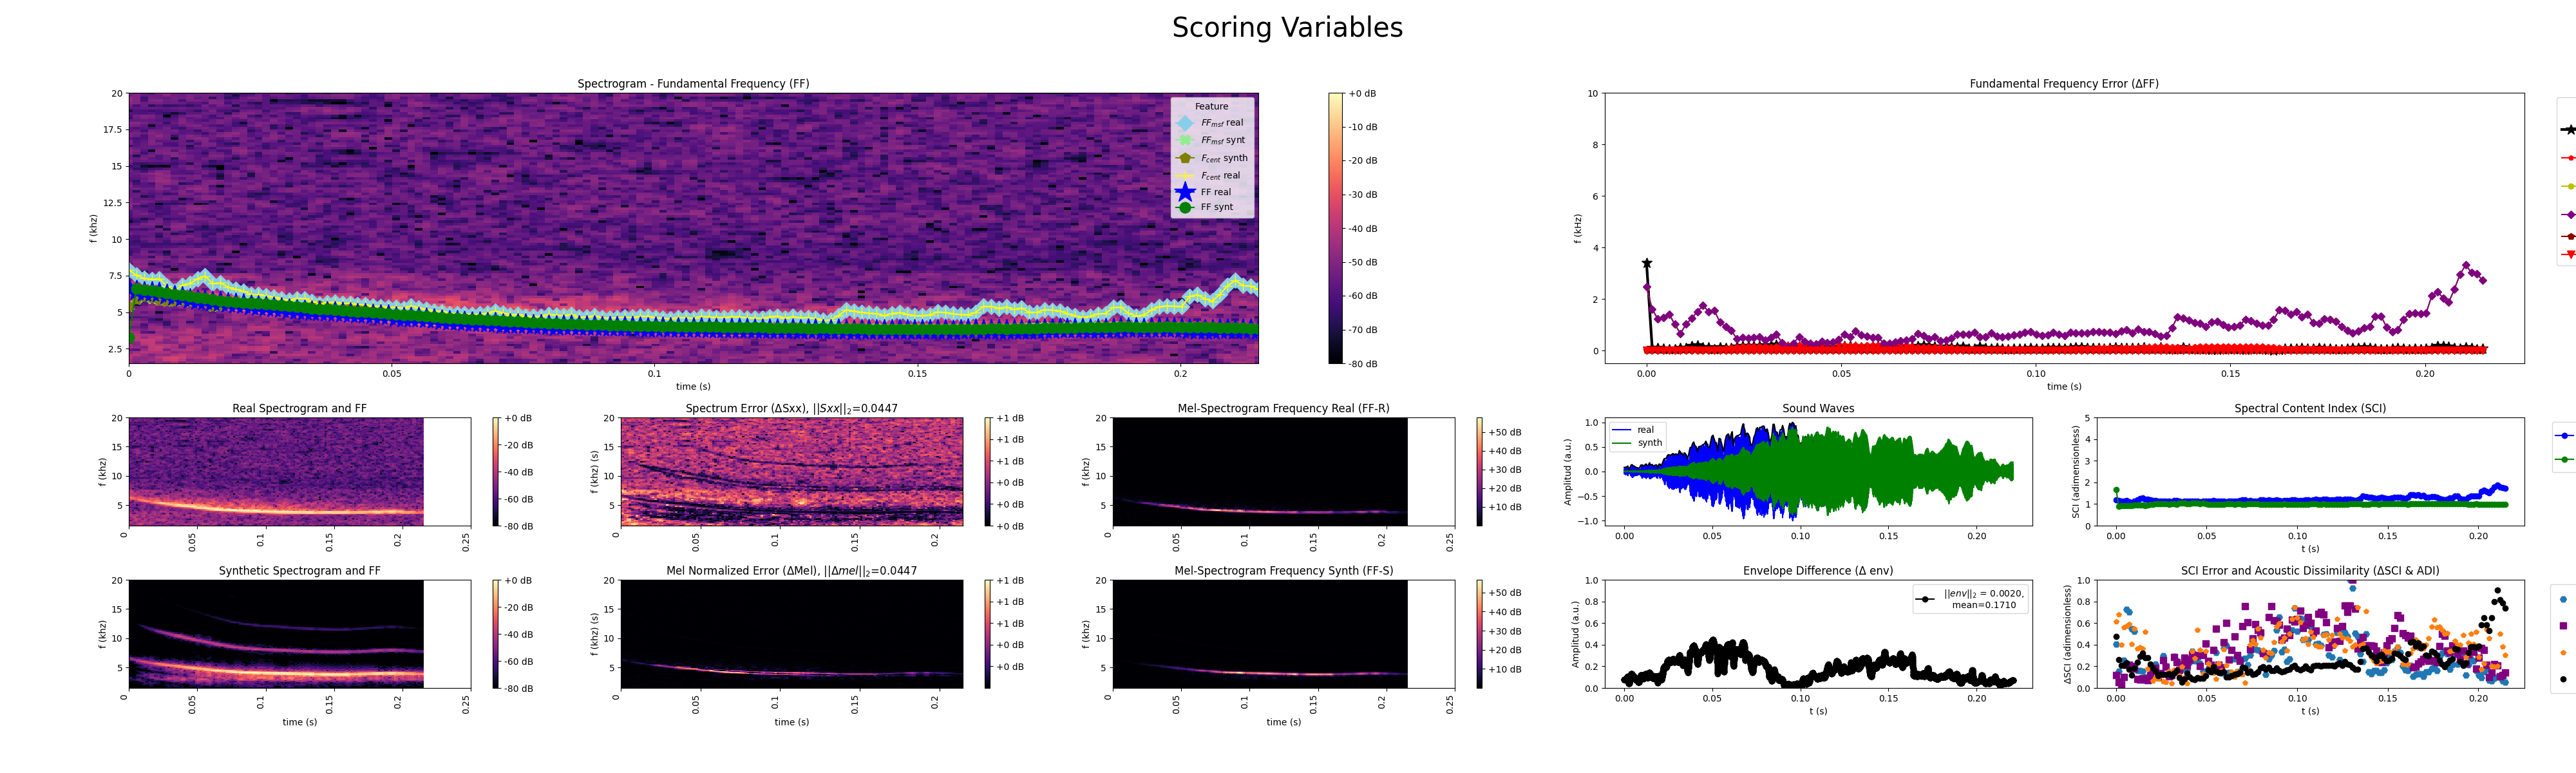

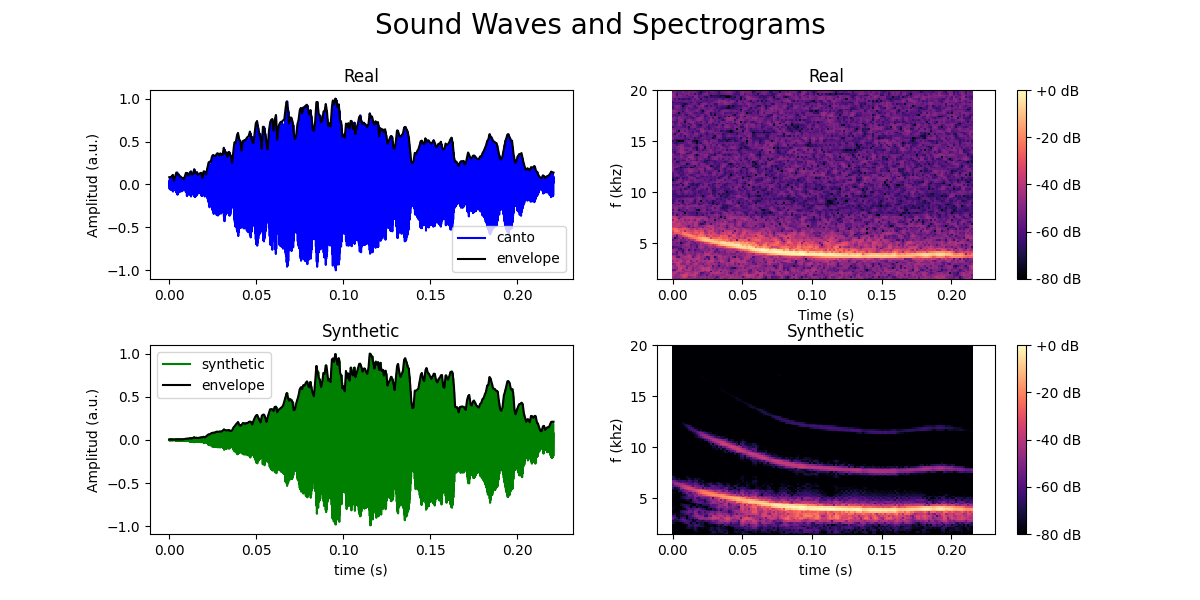

In [21]:
ploter.PlotVs(synth_syllable)
ploter.PlotAlphaBeta(synth_syllable)
ploter.Result(syllable, synth_syllable)
ploter.Syllables(syllable, synth_syllable)
AudioPlay(synth_syllable)

In [22]:
AudioPlay(syllable)

Write synthetic and real syllables

In [23]:
syllable.WriteAudio()
synth_syllable.WriteAudio()

/home/saguileran/miniconda3/lib/python3.8/site-packages/scikit_maad-1.3.12-py3.8.egg/maad/sound/input_output.py:390: UserWarning: Values for bit depth should be 8, 16 or 32. Argument ignored.
  warn('Values for bit depth should be 8, 16 or 32. Argument ignored.')
